In [19]:
import pandas as pd
import numpy as np
# import matplotlib.pylpot as plt
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.xls')

In [8]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.drop('CustomerId',axis = 'columns',inplace = True)
df.drop('RowNumber',axis = 'columns',inplace = True)
df.drop('Surname',axis = 'columns',inplace = True)

In [10]:
df.shape

(10000, 11)

In [11]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [13]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
pd.to_numeric(df.Exited)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [15]:
df[df.Exited==0].shape


(7963, 11)

In [16]:
CR_exited_no = df[df.Exited==0].CreditScore
CR_exited_yes = df[df.Exited==1].CreditScore

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


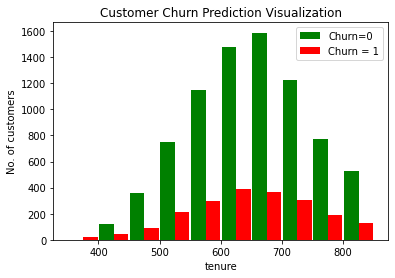

In [20]:
import matplotlib.pyplot as plt
plt.xlabel('tenure')
plt.ylabel('No. of customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([CR_exited_no,CR_exited_yes],rwidth = 0.95,color=['green','red'],label = ['Churn=0','Churn = 1'])
plt.legend()

In [22]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}:{df[column].unique()}')

In [23]:
print_unique_col_values(df)

Surname:['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [24]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)
df['Geography'].replace({'France':1,'Spain':0,'Germany':2},inplace=True)

In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,0,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,0,1,43,2,125510.82,1,1,1,79084.10,0


In [26]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)


In [27]:
X_test.shape


(2000, 13)

In [28]:

import tensorflow as tf
from tensorflow import keras
